## Polynomial Chaos Expansion Example 1

Author: Katiana Kontolati \
Date: December 8, 2020

In this example, PCE is used to generate a surrogate model for a given set of 1D data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from UQpy.Surrogates import *

Define a function.

In [2]:
def function(x):                                
    return x*np.sin(x)/10

Create a distribution object, generate samples and evaluate the function at the samples.

In [3]:
np.random.seed(1)

dist = Uniform(loc=0, scale=10)   
n_samples = 30         
x = dist.rvs(n_samples)  
y = function(x)  

Create an object from the PCE class.

In [4]:
max_degree = 7
polys = Polynomials(dist_object=dist, degree=max_degree) 

Compute PCE coefficients using least sqaures regression. 

In [5]:
lstsq = PolyChaosLstsq(poly_object=polys)
pce = PCE(method=lstsq) 
pce.fit(x,y)

Compute PCE coefficients using Lasso regression.

In [6]:
lasso = PolyChaosLasso(poly_object=polys, learning_rate=0.01, iterations=1000, penalty=0.1)
pce2 = PCE(method=lasso) 
pce2.fit(x,y)

Compute PCE coefficients with Ridge regression.

In [7]:
ridge = PolyChaosRidge(poly_object=polys, learning_rate=0.01, iterations=1000, penalty=0.1)
pce3 = PCE(method=ridge) 
pce3.fit(x,y)

PCE surrogate is used to predict the behavior of the function at new samples.

In [8]:
x_test = dist.rvs(100)
x_test.sort(axis=0) 

y_test = pce.predict(x_test)
y_test2 = pce2.predict(x_test)
y_test3 = pce3.predict(x_test)

Plot training data, true function and PCE surrogate

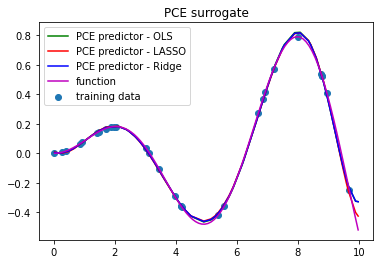

In [9]:
n_samples_ = 100
x_ = np.linspace(min(x_test), max(x_test), n_samples_)
f = function(x_)

plt.figure()
plt.plot(x_test, y_test, 'g', label='PCE predictor - OLS')
plt.plot(x_test, y_test2, 'r', label='PCE predictor - LASSO')
plt.plot(x_test, y_test3, 'b', label='PCE predictor - Ridge')
plt.scatter(x, y, label='training data')
plt.plot(x_, f, 'm', label='function')
plt.title('PCE surrogate')
#plt.ylim(-0.6,0.9)
plt.legend(); plt.show()

### Error Estimation

Construct a validation dataset and get the validation error.

In [10]:
n_samples = 20
x_val = dist.rvs(n_samples)
y_val = function(x_val)

error = ErrorEstimation(surr_object=pce)
error2 = ErrorEstimation(surr_object=pce2)
error3 = ErrorEstimation(surr_object=pce3)

print('Error from least squares regression is: ', error.validation(x_val, y_val))
print('Error from LASSO regression is: ', error2.validation(x_val, y_val))
print('Error from Ridge regression is: ', error3.validation(x_val, y_val))

Error from least squares regression is:  0.000982
Error from LASSO regression is:  0.0012424
Error from Ridge regression is:  0.0008246


### Moment Estimation

Returns mean and variance of the PCE surrogate.

In [11]:
n_mc = 1000000
x_mc = dist.rvs(n_mc)  
y_mc = function(x_mc)  
mu = np.mean(y_mc)

print('Moments from least squares regression :', MomentEstimation(surr_object=pce).get())
print('Moments from LASSO regression :', MomentEstimation(surr_object=pce2).get())
print('Moments from Ridge regression :', MomentEstimation(surr_object=pce3).get())
print('Moments from Monte Carlo integration: ', (round((1/n_mc)*np.sum(y_mc),6), round((1/n_mc)*np.sum((y_mc-mu)**2),6)))

Moments from least squares regression : (0.08143, 0.136647)
Moments from LASSO regression : (0.078796, 0.137014)
Moments from Ridge regression : (0.081477, 0.13525)
Moments from Monte Carlo integration:  (0.078906, 0.136831)
